# Unit 12 - Tales from the Crypto

## Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
from dotenv import load_dotenv
from collections import Counter

from newsapi import NewsApiClient
from nltk import ngrams
from wordcloud import WordCloud

# custom files
from news_sentiment import headlines_sentiment
from text_processor import process_text

import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Grep\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Grep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles

# Had to use get_everything endpoint because there were 0 articles in get_latest_headlines endpoint
btc_headlines = newsapi.get_everything(q="bitcoin", from_param="2021-11-15", language="en", sort_by="relevancy",page_size=100)
print(f"Total articles about bitcoin: {btc_headlines['totalResults']}")

Total articles about bitcoin: 2533


In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="ethereum", from_param="2021-11-15", language="en", sort_by="relevancy", page_size=100)
print(f"Total articles about ethereum: {eth_headlines['totalResults']}")

Total articles about ethereum: 1054


In [6]:
# Create the Bitcoin sentiment scores DataFrame

btc_df = pd.DataFrame(headlines_sentiment(btc_headlines))

#Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols].set_index('date')

btc_df.head()


,text,compound,positive,negative,neutral
date,,,,,
2021-11-22,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...",0.0000,0.000,0.000,1.000
2021-11-22,Posted \r\nAfter becoming the first country to...,0.4767,0.136,0.000,0.864
2021-11-22,Spotify has removed the shuffle button from al...,0.0000,0.000,0.000,1.000
2021-11-17,Australian Baseball League club Perth Heat wil...,-0.1027,0.000,0.043,0.957
2021-11-16,Representations of the virtual currency Bitcoi...,0.0000,0.000,0.000,1.000


In [7]:
# Create the Ethereum sentiment scores DataFrame

eth_df = pd.DataFrame(headlines_sentiment(eth_headlines))

#Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols].set_index('date')

eth_df.head()


,text,compound,positive,negative,neutral
date,,,,,
2021-11-19,"If you claim ownership, someone will probably ...",0.7783,0.216,0.000,0.784
2021-11-23,Ethereum has been on a tear this year. Its out...,0.6542,0.178,0.000,0.822
2021-11-23,Regal movie theater.Shutterstock\r\nMovie-thea...,0.3818,0.080,0.000,0.920
2021-11-19,Bitcoin has lost almost 20 per cent in less th...,-0.3182,0.000,0.062,0.938
2021-11-19,"Image source, Getty Images\r\nImage caption, T...",0.0772,0.070,0.062,0.867


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.00000
mean,0.072025,0.053070,0.034890,0.91205
std,0.392400,0.059235,0.058974,0.07697
min,-0.831600,0.000000,0.000000,0.72800
25%,-0.029800,0.000000,0.000000,0.85600
50%,0.000000,0.046500,0.000000,0.92050
75%,0.366350,0.080000,0.062000,1.00000
max,0.857300,0.246000,0.229000,1.00000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.00000,100.000000
mean,0.126573,0.058430,0.03019,0.911390
std,0.388060,0.071052,0.04905,0.083637
min,-0.831600,0.000000,0.00000,0.536000
25%,0.000000,0.000000,0.00000,0.866000
50%,0.000000,0.045500,0.00000,0.920000
75%,0.449500,0.093250,0.06050,1.000000
max,0.889900,0.299000,0.21800,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

* ETH, with a mean positive score of 0.064550

Q: Which coin had the highest compound score?

* BTC, with a max compound score of 0.857300

Q. Which coin had the highest positive score?

* ETH, with a max positive score of 0.299000

---

## 2. Natural Language Processing

###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
# Create a list of stopwords
sw_custom = {'char','said','million','billion','reuters','ha','u', 'say', 'wa', 'nov','dollar','week','month', "monday", 'day', 'wednesday', 'friday', 'tuesday'}

In [11]:
# Run the text_processor function for Bitcoin headlines
btc_tokenized = [process_text(text, sw_custom) for text in btc_df['text']]

# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_tokenized
btc_df.head(3)

,text,compound,positive,negative,neutral,tokens
date,,,,,,
2021-11-22,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...",0.0000,0.000,0.0,1.000,"[mizata, el, salvadorlondon, el, salvador, pla..."
2021-11-22,Posted \r\nAfter becoming the first country to...,0.4767,0.136,0.0,0.864,"[posted, becoming, first, country, accept, cry..."
2021-11-22,Spotify has removed the shuffle button from al...,0.0000,0.000,0.0,1.000,"[spotify, removed, shuffle, button, album, pag..."


In [12]:
# Run the text_processor function for Ethereum headlines
eth_tokenized = [process_text(text, sw_custom) for text in eth_df['text']]

# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_tokenized
eth_df.head(3)

,text,compound,positive,negative,neutral,tokens
date,,,,,,
2021-11-19,"If you claim ownership, someone will probably ...",0.7783,0.216,0.0,0.784,"[claim, ownership, someone, probably, want, ta..."
2021-11-23,Ethereum has been on a tear this year. Its out...,0.6542,0.178,0.0,0.822,"[ethereum, tear, year, outperformed, bitcoin, ..."
2021-11-23,Regal movie theater.Shutterstock\r\nMovie-thea...,0.3818,0.080,0.0,0.920,"[regal, movie, theatershutterstockmovietheater..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [13]:
# Define functions to generate N-grams and top 10 tokens

# Function token_count generates the top 10 words for a given coin
def token_count(tokens, n_results):
    """Returns the top N tokens from the frequency count"""
    big_string = ' '.join(map(str,tokens))
    processed = process_text(big_string, sw_custom)
    topN = dict(Counter(processed).most_common(n_results))
    return pd.DataFrame(list(topN.items()), columns=['Word', 'Count']).set_index('Word')

# Function bigrams_counter retrieves bigrams in a list of texts
def bigrams_counter(texts, n_results): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(texts)
    processed = process_text(big_string, sw_custom)
    bigrams = ngrams(processed, n=2)
    top = dict(Counter(bigrams).most_common(n_results))
    return pd.DataFrame(list(top.items()), columns=['Bigram', 'Count']).set_index('Bigram')

In [14]:
# Generate the Bitcoin N-grams where N=2
bigrams_counter(btc_df['text'], 10)

,Count
Bigram,
"(el, salvador)",8
"(bitcoin, city)",7
"(new, york)",7
"(president, nayib)",6
"(nayib, bukele)",6
"(picture, illustration)",6
"(illustration, taken)",6
"(plan, build)",5
"(world, first)",5


In [15]:
# Generate the Ethereum N-grams where N=2
bigrams_counter(eth_df['text'], 10)

,Count
Bigram,
"(copy, us)",7
"(us, constitution)",7
"(every, nft)",5
"(bitcoin, ethereum)",5
"(cryptocurrency, market)",5
"(crypto, market)",4
"(nft, ethereum)",4
"(created, website)",3
"(alltime, high)",3


In [16]:
# Use token_count to get the top 10 words for Bitcoin
btc_tokens_top10 =  token_count(btc_df['tokens'], 10)
btc_tokens_top10

,Count
Word,
bitcoin,43
cryptocurrency,19
crypto,13
new,13
world,12
president,12
city,11
el,10
salvador,10


In [17]:
# Use token_count to get the top 10 words for Ethereum
eth_tokens_top10 =  token_count(eth_df['tokens'], 10)
eth_tokens_top10

#noticed that lemmatizer doesn't lemmatize "cryptocurrencies"

,Count
Word,
cryptocurrency,30
bitcoin,26
crypto,23
ethereum,20
market,20
cryptocurrencies,19
price,15
year,12
nft,12


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

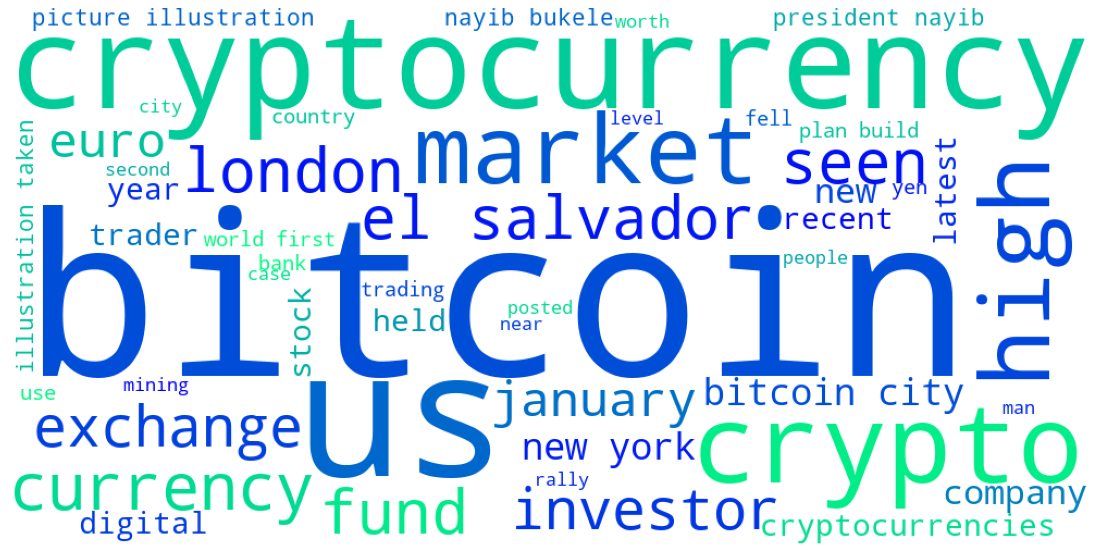

In [18]:
# Generate the Bitcoin word cloud

btc_string = ' '.join(btc_df['text'])
btc_text = process_text(btc_string, sw_custom)

wc = WordCloud(max_words=50, width=1000, height=500, background_color="white", colormap="winter").generate(' '.join(btc_text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(wc)

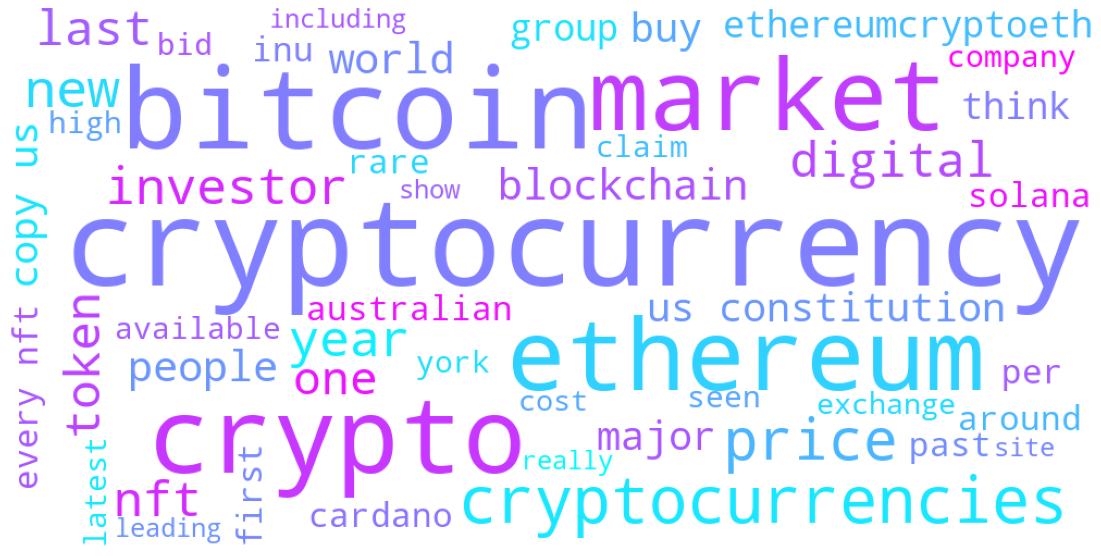

In [19]:
# Generate the Ethereum word cloud

eth_string = ' '.join(eth_df['text'])
eth_text = process_text(eth_string, sw_custom)

wc = WordCloud(max_words=50, width=1000, height=500, background_color="white", colormap="cool").generate(' '.join(eth_text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [20]:
import spacy
from spacy import displacy

In [21]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [22]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [23]:
# Concatenate all of the Bitcoin text together
concat_btc_text = ' '.join(map(str,btc_df['text']))

In [24]:
# Run the NER processor on all of the text

# Set article to be analyzed with spaCy
btc_ner = nlp(concat_btc_text)

# Add a title to the document
btc_ner.user_data['title'] = 'Name Entity Recognition for Bitcoin Headlines'

In [25]:
# Render NER visualization with displacy
displacy.render(btc_ner, style='ent')

In [33]:
# List all Entities
ent_labels=[]
entities=[]
for ent in btc_ner.ents:
    ent_labels.append(ent.label_)
    entities.append(ent.text)

btc_entities = pd.DataFrame([entities, ent_labels]).T
btc_entities.columns = ['Name Entity', 'Label']
btc_entities.head(10)

,Name Entity,Label
0,MIZATA,ORG
1,El Salvador,GPE
2,LONDON,GPE
3,Nov 22,DATE
4,Reuters,ORG
5,El Salvador,GPE
6,first,ORDINAL
7,Bitcoin City,WORK_OF_ART
8,$1 billion,MONEY
9,Nayib Bukele,PERSON


In [27]:
# Count type of entities found
btc_entities.describe()

,Name Entity,Label
count,485,485
unique,270,15
top,Reuters,ORG
freq,49,130


---

### Ethereum NER

In [28]:
# Concatenate all of the Ethereum text together
concat_eth_text = ' '.join(map(str,eth_df['text']))

In [29]:
# Run the NER processor on all of the text
eth_ner = nlp(concat_eth_text)

# Add a title to the document
eth_ner.user_data['title'] = 'Name Entity Recognition for Ethereum Headlines'

In [30]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [34]:
# List all Entities

ent_labels=[]
entities=[]

for ent in eth_ner.ents:
    ent_labels.append(ent.label_)
    entities.append(ent.text)

eth_entities = pd.DataFrame([entities, ent_labels]).T
eth_entities.columns = ['Name Entity', 'Label']
eth_entities.head(10)

,Name Entity,Label
0,this year,DATE
1,Australian Geoffrey Huntley,ORG
2,Ethereum,PERSON
3,this year,DATE
4,this year,DATE
5,Mark Cuban,PERSON
6,Regal Cinemas,PERSON
7,more than 500,CARDINAL
8,dozens,CARDINAL
9,almost 20 per cent,MONEY


In [32]:
# Count type of entities found
eth_entities.describe()

,Name Entity,Label
count,334,334
unique,234,13
top,Ethereum,ORG
freq,14,86


---